### Perform EDA and build a model to predict medical insurance costs
1. Perform data cleaning
2. Deal with missing and duplicate values
3. Perform Exploratory data analysis
4. Explain which factors influence cost of medical insurance
5. Perform data preprocessing
6. Select best features for training the model (Feature engineering)
7. Train the model using several regression models and find the best model suitable for the problem
8. Use hyperparameter tuning to find best parameters for the algorithm
9. Evaluate the model using various evaluation metrics


In [402]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [403]:
# reading the dataset
data = pd.read_csv('insurance.csv')
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [330]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [331]:
data.isnull().sum()                  # checking for null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [404]:
data.duplicated().sum()              # checking for duplicate values

1

In [333]:
data.drop_duplicates(inplace = True)

In [334]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

<AxesSubplot:xlabel='charges', ylabel='Density'>

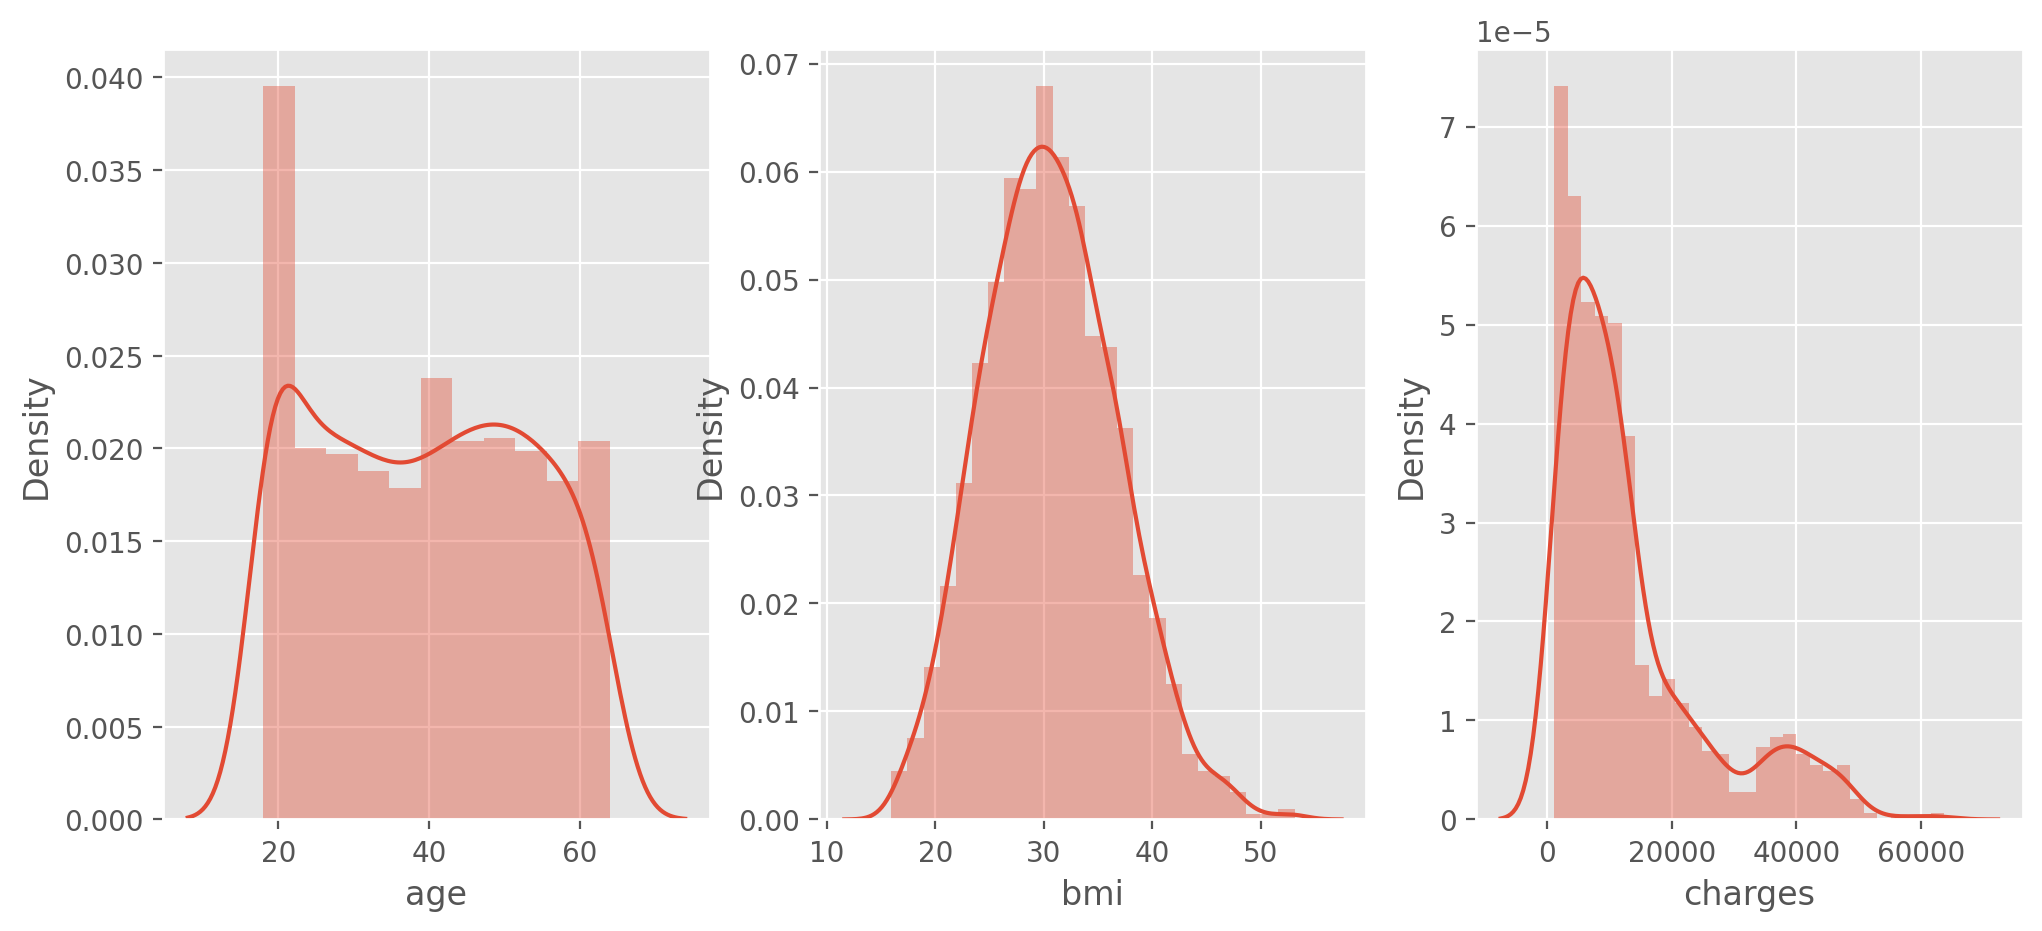

In [335]:
plt.figure(figsize=(12,5),dpi=200)
plt.subplot(1,3,1)
sns.distplot(data.age)

plt.subplot(1,3,2)
sns.distplot(data.bmi)

plt.subplot(1,3,3)
sns.distplot(data.charges)

<AxesSubplot:xlabel='region', ylabel='charges'>

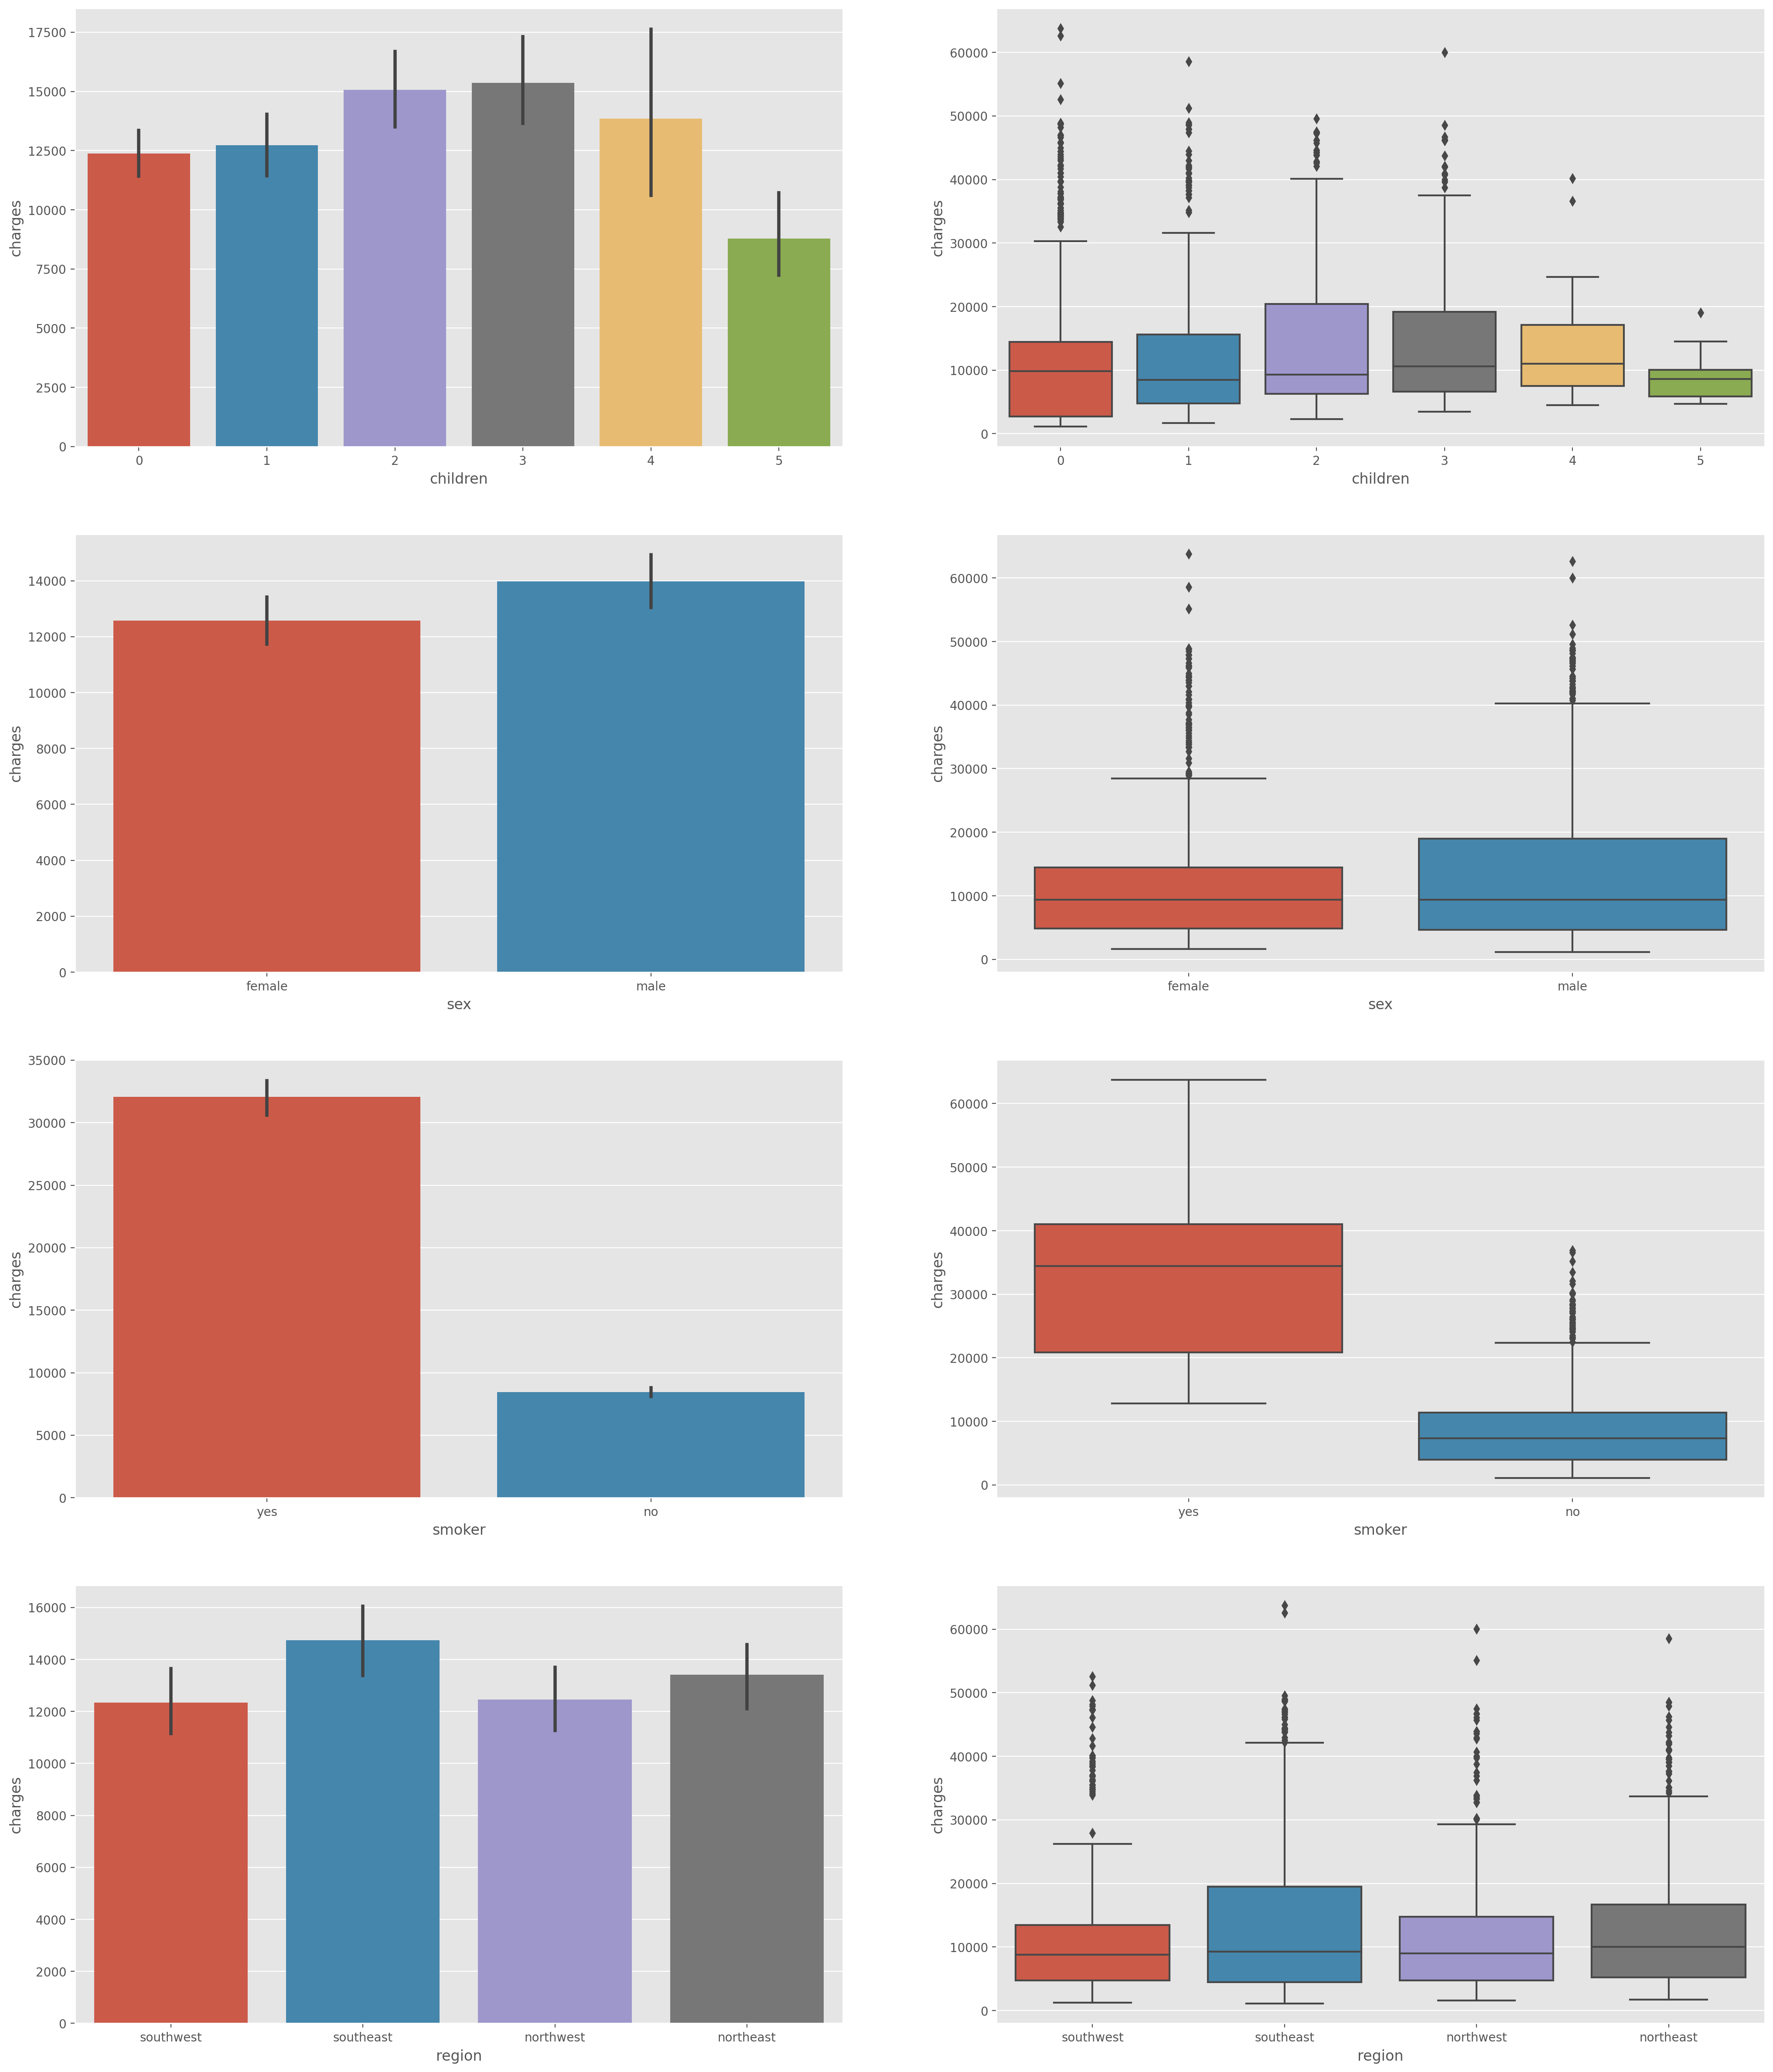

In [336]:
plt.figure(figsize=(25,30),dpi=200)

plt.subplot(4,2,1)
sns.barplot(data.children,data.charges)

plt.subplot(4,2,2)
sns.boxplot(data.children,data.charges)

plt.subplot(4,2,3)
sns.barplot(data.sex,data.charges)

plt.subplot(4,2,4)
sns.boxplot(data.sex,data.charges)

plt.subplot(4,2,5)
sns.barplot(data.smoker,data.charges)

plt.subplot(4,2,6)
sns.boxplot(data.smoker,data.charges)

plt.subplot(4,2,7)
sns.barplot(data.region,data.charges)

plt.subplot(4,2,8)
sns.boxplot(data.region,data.charges)

In [337]:
data.sex.value_counts()

male      675
female    662
Name: sex, dtype: int64

### Almost 50% of the insurance holders are female and 50% males.

In [338]:
data.children.value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

### Among the policy holders 573 were without childrens.

In [339]:
print("Age of the youngest person to take the insurance : ",data.age.min())
print("Age of the oldest person to take the insurance   : ",data.age.max())

Age of the youngest person to take the insurance :  18
Age of the oldest person to take the insurance   :  64


### youngest person to take the insurance is of age 18 and oldest person 64 years old.

In [340]:
data.smoker.value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [341]:
x = data.smoker.value_counts()[1]
y = data.smoker.count()
print("Percentage of people who smoke : ",round(x/y*100,2))

Percentage of people who smoke :  20.49


### Only 20% among the policy holders were smokers.

In [342]:
data.region.value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

<AxesSubplot:xlabel='smoker', ylabel='count'>

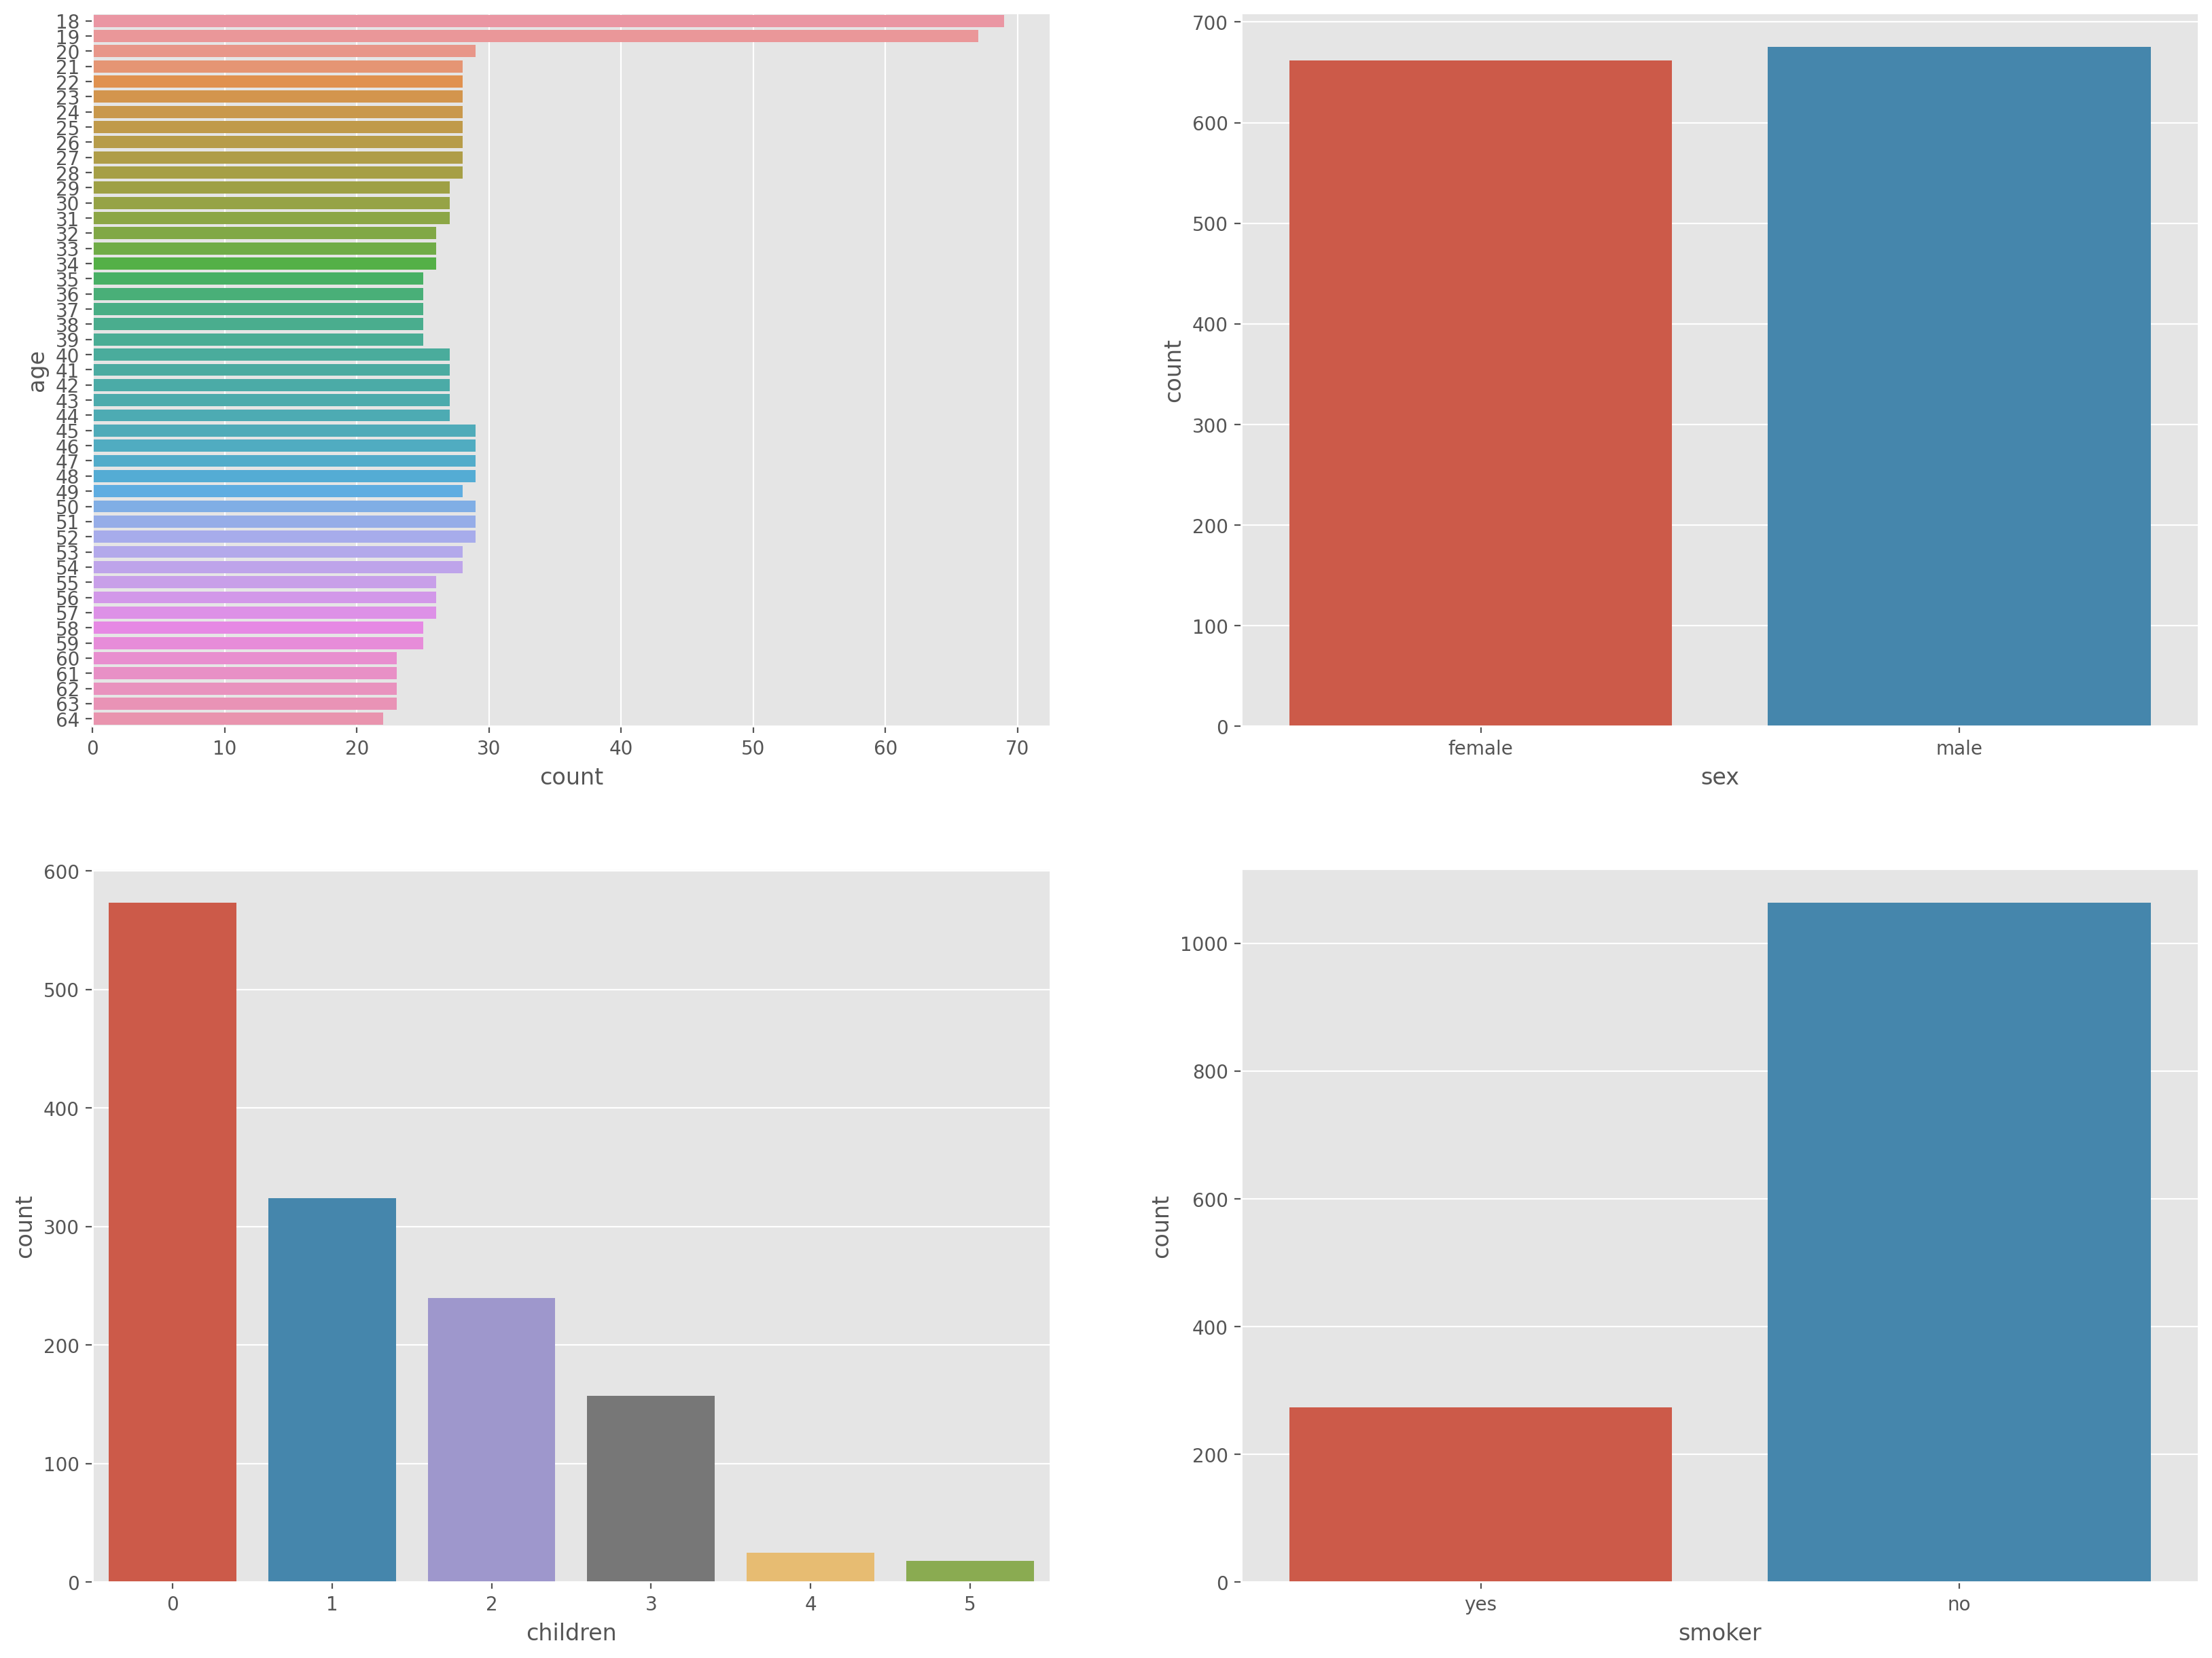

In [343]:
plt.figure(figsize=(20,15),dpi=200)

plt.subplot(2,2,1)
sns.countplot(y = data.age)

plt.subplot(2,2,2)
sns.countplot(data.sex)

plt.subplot(2,2,3)
sns.countplot(data.children)

plt.subplot(2,2,4)
sns.countplot(data.smoker)

## =======================================================================

#### - Highest no.of policy holders from the age category 18-19.
#### - The people who smoke paid more premium amount compared to non-smokers.
#### - Family with more no.of childrens chose insurance with less premium.

## =======================================================================

<AxesSubplot:xlabel='charges', ylabel='bmi'>

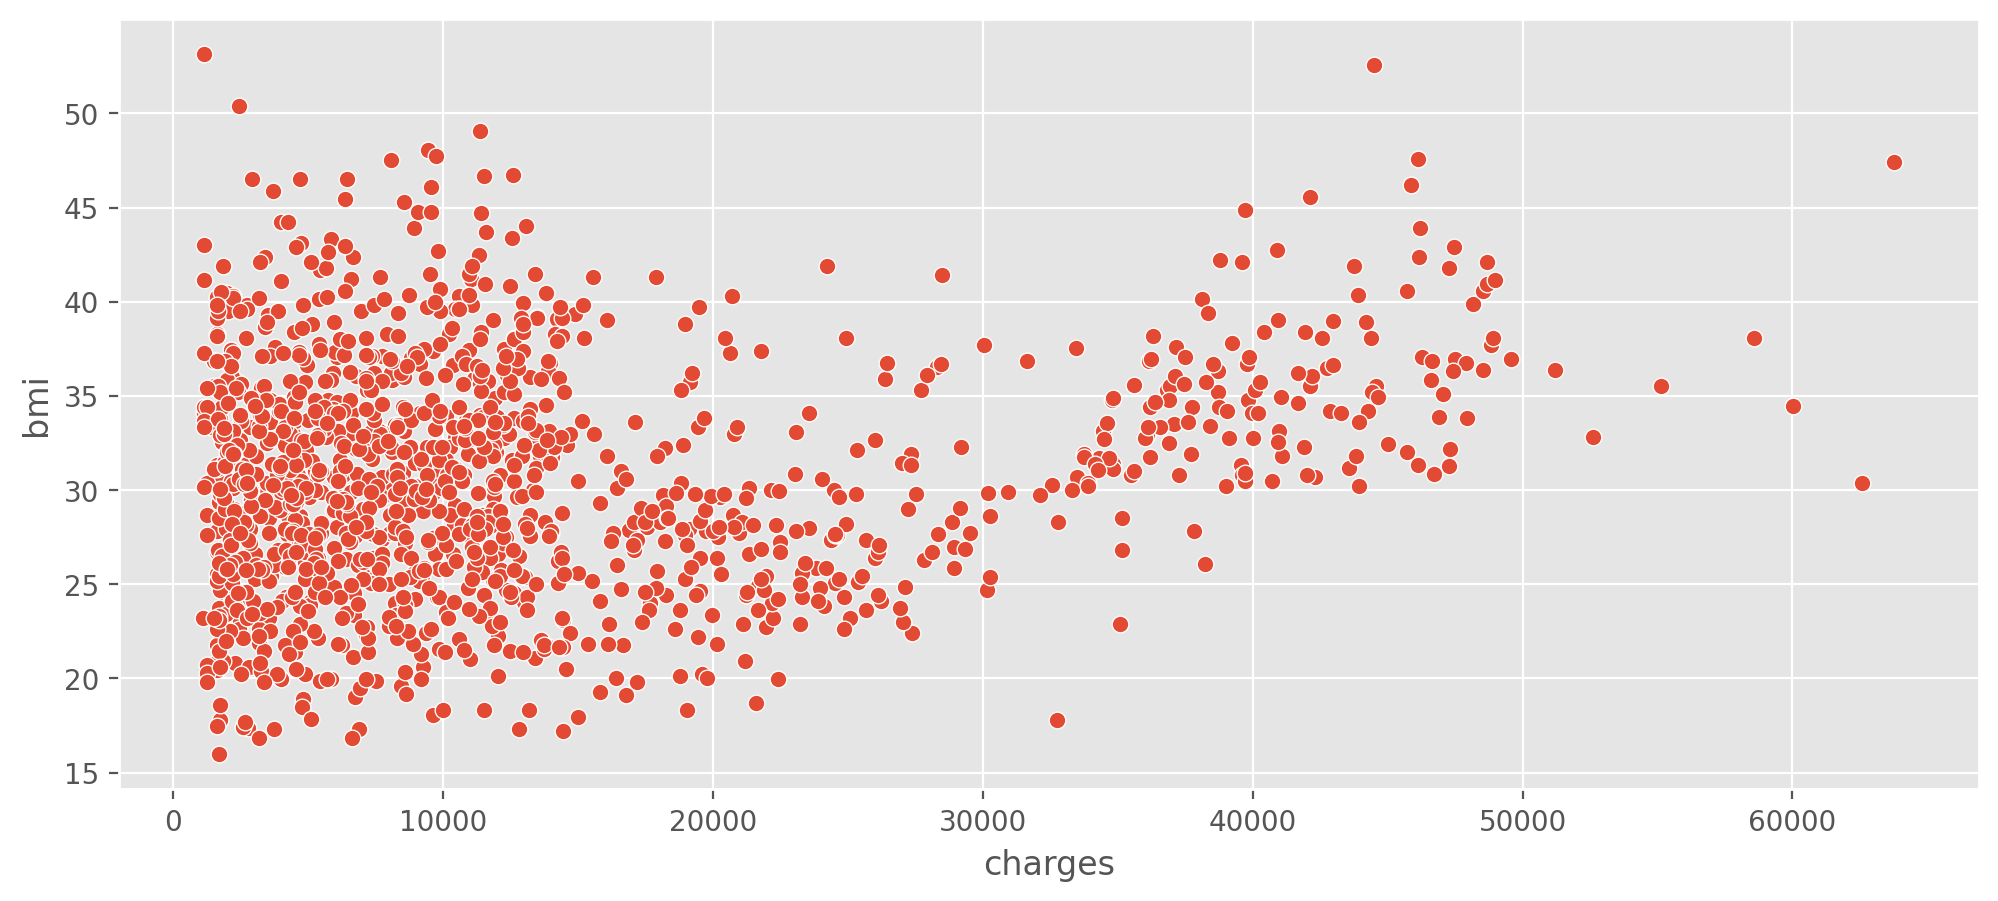

In [344]:
plt.figure(figsize=(12,5),dpi=200)
sns.scatterplot(data.charges,data.bmi)

In [345]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [346]:
# Seperating the independent and dependent features.

cols=["age","sex","children","smoker","bmi","region"]
X = data[cols]
Y = data[['charges']]

In [347]:
X.head()

,age,sex,children,smoker,bmi,region
0,19,female,0,yes,27.900,southwest
1,18,male,1,no,33.770,southeast
2,28,male,3,no,33.000,southeast
3,33,male,0,no,22.705,northwest
4,32,male,0,no,28.880,northwest


In [348]:
Y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [349]:
print('Independent Feature Set Shape : ', X.shape)
print('Dependent Feature Set Shape   : ', Y.shape)

Independent Feature Set Shape :  (1337, 6)
Dependent Feature Set Shape   :  (1337, 1)


In [350]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = ["age","bmi"]
X[cols]=scaler.fit_transform(X[cols])
X.head()

,age,sex,children,smoker,bmi,region
0,0.021739,female,0,yes,0.321227,southwest
1,0.000000,male,1,no,0.479150,southeast
2,0.217391,male,3,no,0.458434,southeast
3,0.326087,male,0,no,0.181464,northwest
4,0.304348,male,0,no,0.347592,northwest


In [351]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
cols = ["sex","smoker","region"]
X[cols] = encoder.fit_transform(X[cols])
X.head(10)

,age,sex,children,smoker,bmi,region
0,0.021739,0.0,0,1.0,0.321227,3.0
1,0.000000,1.0,1,0.0,0.479150,2.0
2,0.217391,1.0,3,0.0,0.458434,2.0
3,0.326087,1.0,0,0.0,0.181464,1.0
4,0.304348,1.0,0,0.0,0.347592,1.0
5,0.282609,0.0,0,0.0,0.263115,2.0
6,0.608696,0.0,1,0.0,0.470272,2.0
7,0.413043,0.0,3,0.0,0.316922,1.0
8,0.413043,1.0,2,0.0,0.373150,0.0
9,0.913043,0.0,0,0.0,0.265806,1.0


In [352]:
# Splitting the data for training and testing. 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25,random_state = 42)

In [353]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing  Data Shape   : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (1002, 6)
Training Labels Shape :  (1002, 1)
Testing  Data Shape   :  (335, 6)
Testing Labels Shape  :  (335, 1)


In [354]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

### Applying different Regression models for getting the best result.

In [355]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [356]:
y_pred = regressor.predict(x_test)
print("Mean square error       : ",mean_squared_error(y_test, y_pred))
print("Root mean sqaured error : ",mean_squared_error(y_test, y_pred,squared=False))
print("Mean absolute error     : ",mean_absolute_error(y_test, y_pred))
print('Training set score : ', regressor.score(x_train, y_train))
print('Testing set score  : ', regressor.score(x_test, y_test))

Mean square error       :  35229015.327337496
Root mean sqaured error :  5935.403552188975
Mean absolute error     :  4063.077379310584
Training set score :  0.7294365233101179
Testing set score  :  0.7962578620326618


In [357]:
from sklearn.linear_model import SGDRegressor
regressor = SGDRegressor(alpha = 0.001)
regressor.fit(x_train, y_train)

SGDRegressor(alpha=0.001)

In [358]:
y_pred = regressor.predict(x_test)
print("Mean square error       : ",mean_squared_error(y_test, y_pred))
print("Root mean sqaured error : ",mean_squared_error(y_test, y_pred,squared=False))
print("Mean absolute error     : ",mean_absolute_error(y_test, y_pred))
print('Training set score : ', regressor.score(x_train, y_train))
print('Testing set score  : ', regressor.score(x_test, y_test))

Mean square error       :  36726787.265282325
Root mean sqaured error :  6060.26296997765
Mean absolute error     :  3987.273233576039
Training set score :  0.7261244005652594
Testing set score  :  0.7875957051716507


In [359]:
from sklearn.linear_model import Lasso
regressor = Lasso(alpha = 1)
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)
print("Mean square error       : ",mean_squared_error(y_test, y_pred))
print("Root mean sqaured error : ",mean_squared_error(y_test, y_pred,squared=False))
print("Mean absolute error     : ",mean_absolute_error(y_test, y_pred))
print('Training set score : ', regressor.score(x_train, y_train))
print('Testing set score  : ', regressor.score(x_test, y_test))

Mean square error       :  35247555.86080778
Root mean sqaured error :  5936.96520629924
Mean absolute error     :  4062.498426584089
Training set score :  0.7294360695988944
Testing set score  :  0.7961506354214951


In [360]:
from sklearn.linear_model import Ridge
regressor = Ridge(alpha = 1)
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)
print("Mean square error       : ",mean_squared_error(y_test, y_pred))
print("Root mean sqaured error : ",mean_squared_error(y_test, y_pred,squared=False))
print("Mean absolute error     : ",mean_absolute_error(y_test, y_pred))
print('Training set score : ', regressor.score(x_train, y_train))
print('Testing set score  : ', regressor.score(x_test, y_test))

Mean square error       :  35499088.006591834
Root mean sqaured error :  5958.111110628253
Mean absolute error     :  4064.0907377715416
Training set score :  0.7293677915203896
Testing set score  :  0.7946959340432881


In [382]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors = 5)
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)
print("Mean square error       : ",mean_squared_error(y_test, y_pred))
print("Root mean sqaured error : ",mean_squared_error(y_test, y_pred,squared=False))
print("Mean absolute error     : ",mean_absolute_error(y_test, y_pred))
print('Training set score : ', regressor.score(x_train, y_train))
print('Testing set score  : ', regressor.score(x_test, y_test))

Mean square error       :  42910188.82240692
Root mean sqaured error :  6550.5869067135445
Mean absolute error     :  4056.6635419134327
Training set score :  0.7941489500227524
Testing set score  :  0.7518348574314211


In [362]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth = 5, criterion = 'mse')
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)
print("Mean square error       : ",mean_squared_error(y_test, y_pred))
print("Root mean sqaured error : ",mean_squared_error(y_test, y_pred,squared=False))
print("Mean absolute error     : ",mean_absolute_error(y_test, y_pred))
print('Training set score : ', regressor.score(x_train, y_train))
print('Testing set score  : ', regressor.score(x_test, y_test))

Mean square error       :  20755941.06537969
Root mean sqaured error :  4555.86885954586
Mean absolute error     :  2601.917214356799
Training set score :  0.8703267110834461
Testing set score  :  0.8799608853982654


In [363]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 20, max_depth = 5)
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)
print("Mean square error       : ",mean_squared_error(y_test, y_pred))
print("Root mean sqaured error : ",mean_squared_error(y_test, y_pred,squared=False))
print("Mean absolute error     : ",mean_absolute_error(y_test, y_pred))
print('Training set score : ', regressor.score(x_train, y_train))
print('Testing set score  : ', regressor.score(x_test, y_test))

Mean square error       :  19678264.43551087
Root mean sqaured error :  4436.018985025974
Mean absolute error     :  2529.4804905956157
Training set score :  0.8808819758495232
Testing set score  :  0.8861934791442656


In [364]:
from lightgbm import LGBMRegressor
regressor = LGBMRegressor(n_estimators = 50)
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)
print("Mean square error       : ",mean_squared_error(y_test, y_pred))
print("Root mean sqaured error : ",mean_squared_error(y_test, y_pred,squared=False))
print("Mean absolute error     : ",mean_absolute_error(y_test, y_pred))
print('Training set score : ', regressor.score(x_train, y_train))
print('Testing set score  : ', regressor.score(x_test, y_test))

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000368 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 316
[LightGBM] [Info] Number of data points in the train set: 1002, number of used features: 6
[LightGBM] [Info] Start training from score 13082.300335
Mean square error       :  20744202.421124496
Root mean sqaured error :  4554.580378160484
Mean absolute error     :  2658.099554748947
Training set score :  0.91270123050855
Testing set score  :  0.8800287742238591


In [365]:
from xgboost import XGBRegressor
regressor = XGBRegressor(n_estimators = 15)
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)
print("Mean square error       : ",mean_squared_error(y_test, y_pred))
print("Root mean sqaured error : ",mean_squared_error(y_test, y_pred,squared=False))
print("Mean absolute error     : ",mean_absolute_error(y_test, y_pred))
print('Training set score : ', regressor.score(x_train, y_train))
print('Testing set score  : ', regressor.score(x_test, y_test))

Mean square error       :  21218013.172253776
Root mean sqaured error :  4606.301463457833
Mean absolute error     :  2546.869660717864
Training set score :  0.9273769455694243
Testing set score  :  0.8772885552728037


In [385]:
estimator = DecisionTreeRegressor(max_depth = 7)

from sklearn.ensemble import AdaBoostRegressor
regressor = AdaBoostRegressor(estimator, n_estimators = 25)
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)
print("Mean square error       : ",mean_squared_error(y_test, y_pred))
print("Root mean sqaured error : ",mean_squared_error(y_test, y_pred,squared=False))
print("Mean absolute error     : ",mean_absolute_error(y_test, y_pred))
print('Training set score : ', regressor.score(x_train, y_train))
print('Testing set score  : ', regressor.score(x_test, y_test))

Mean square error       :  25809767.978089347
Root mean sqaured error :  5080.331483091369
Mean absolute error     :  3760.1751039555124
Training set score :  0.9079628610036364
Testing set score  :  0.85073277639366


In [367]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [368]:
knn_Regressor   = KNeighborsRegressor(n_neighbors = 5)
dt_Regressor    = DecisionTreeRegressor(max_depth = 8,criterion='mse')
rf_Regressor    = RandomForestRegressor(n_estimators = 50, max_depth = 7)
xgb_Regressor   = XGBRegressor(n_estimators = 15, max_depth = 5)
lgbm_Regressor  = LGBMRegressor(n_estimators = 50)

In [369]:
from sklearn.ensemble import VotingRegressor
regressor = VotingRegressor(estimators = [('knn', knn_Regressor),
                                            ('dt', dt_Regressor),
                                            ('rf', rf_Regressor),
                                            ('xgb', xgb_Regressor),
                                            ('lgbm', lgbm_Regressor)])

regressor.fit(x_train, y_train)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000426 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 316
[LightGBM] [Info] Number of data points in the train set: 1002, number of used features: 6
[LightGBM] [Info] Start training from score 13082.300335


VotingRegressor(estimators=[('knn', KNeighborsRegressor()),
                            ('dt',
                             DecisionTreeRegressor(criterion='mse',
                                                   max_depth=8)),
                            ('rf',
                             RandomForestRegressor(max_depth=7,
                                                   n_estimators=50)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical...
                                          importance_type=None,
                                         

In [370]:
from sklearn.metrics import r2_score
pred_train = regressor.predict(x_train)
pred_test  = regressor.predict(x_test)

y_pred = regressor.predict(x_test)
print("Mean square error       : ",mean_squared_error(y_test, y_pred))
print("Root mean sqaured error : ",mean_squared_error(y_test, y_pred,squared=False))
print("Mean absolute error     : ",mean_absolute_error(y_test, y_pred))
print('Training Set Accuracy : ', r2_score(y_train, pred_train))
print('Testing Set Accuracy  : ', r2_score(y_test, pred_test))

Mean square error       :  21819508.67816944
Root mean sqaured error :  4671.135694685977
Mean absolute error     :  2672.410949389968
Training Set Accuracy :  0.9209089242339464
Testing Set Accuracy  :  0.8738098892012628


In [371]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

In [372]:
search_params = {
    'n_estimators' : [10, 20, 30, 40, 50],
    'max_depth'    : [3, 4, 6, 8, 10],
    'max_features' : [4, 5, 6]
}

In [373]:
from sklearn.model_selection import RandomizedSearchCV
randomized_search = RandomizedSearchCV(estimator = regressor,
                                       param_distributions = search_params,
                                       scoring = ['r2'],
                                       cv = 5,
                                       refit = 'r2',
                                       n_iter = 15,
                                       verbose = 3)

randomized_search.fit(x_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END max_depth=8, max_features=4, n_estimators=40; r2: (test=0.815) total time=   0.0s
[CV 2/5] END max_depth=8, max_features=4, n_estimators=40; r2: (test=0.837) total time=   0.0s
[CV 3/5] END max_depth=8, max_features=4, n_estimators=40; r2: (test=0.824) total time=   0.0s
[CV 4/5] END max_depth=8, max_features=4, n_estimators=40; r2: (test=0.842) total time=   0.0s
[CV 5/5] END max_depth=8, max_features=4, n_estimators=40; r2: (test=0.833) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=5, n_estimators=10; r2: (test=0.825) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=5, n_estimators=10; r2: (test=0.851) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=5, n_estimators=10; r2: (test=0.846) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=5, n_estimators=10; r2: (test=0.849) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=5, n_estimators=10; r2: (test=0.847) total ti

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=15,
                   param_distributions={'max_depth': [3, 4, 6, 8, 10],
                                        'max_features': [4, 5, 6],
                                        'n_estimators': [10, 20, 30, 40, 50]},
                   refit='r2', scoring=['r2'], verbose=3)

In [374]:
randomized_search.best_params_

{'n_estimators': 50, 'max_features': 6, 'max_depth': 4}

In [375]:
randomized_search.best_score_

0.8468709591059413

In [376]:
best_model = randomized_search.best_estimator_
best_model

RandomForestRegressor(max_depth=4, max_features=6, n_estimators=50)

In [377]:
df1 = pd.DataFrame(randomized_search.cv_results_).sort_values('mean_test_r2', ascending = False)
df1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2
8,0.110478,0.006189,0.014295,0.002653,50,6,4,"{'n_estimators': 50, 'max_features': 6, 'max_d...",0.823264,0.856427,0.847842,0.853936,0.852887,0.846871,0.012130,1
5,0.068600,0.005503,0.002565,0.003300,30,4,4,"{'n_estimators': 30, 'max_features': 4, 'max_d...",0.817874,0.855625,0.849669,0.852959,0.846917,0.844609,0.013688,2
1,0.019059,0.006620,0.004725,0.006271,10,5,4,"{'n_estimators': 10, 'max_features': 5, 'max_d...",0.825044,0.850735,0.845613,0.849378,0.846765,0.843507,0.009409,3
14,0.076651,0.007013,0.006769,0.005693,40,6,3,"{'n_estimators': 40, 'max_features': 6, 'max_d...",0.812585,0.854231,0.848569,0.849272,0.844442,0.841820,0.014944,4
4,0.119675,0.010383,0.008193,0.007361,50,5,6,"{'n_estimators': 50, 'max_features': 5, 'max_d...",0.821713,0.845978,0.839274,0.844710,0.849604,0.840256,0.009847,5


In [ ]:
df1.to_csv('RandomizedSearchResultsassignment2.csv')

In [387]:
best_model = RandomForestRegressor(max_depth = 4, n_estimators = 20, max_features = 4)
best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)
print("Mean square error       : ",mean_squared_error(y_test, y_pred))
print("Root mean sqaured error : ",mean_squared_error(y_test, y_pred,squared=False))
print("Mean absolute error     : ",mean_absolute_error(y_test, y_pred))
print('Training Set Score : ', best_model.score(x_train, y_train))
print('Testing Set Score  : ', best_model.score(x_test, y_test))

Mean square error       :  19753445.5758757
Root mean sqaured error :  4444.484849324576
Mean absolute error     :  2590.8050648456315
Training Set Score :  0.8622874079160349
Testing Set Score  :  0.8857586794165291


In [388]:
regressor = RandomForestRegressor()

In [389]:
search_params = {
    'n_estimators' : [10, 20, 30, 40, 50],
    'max_depth'    : [3, 4, 6, 8, 10],
    'max_features' : [4, 5, 6]
}

In [390]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = search_params,
                           scoring = ['r2'],
                           cv = 5,
                           refit = 'r2',
                           verbose = 3)

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END max_depth=3, max_features=4, n_estimators=10; r2: (test=0.797) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=4, n_estimators=10; r2: (test=0.850) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=4, n_estimators=10; r2: (test=0.843) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=4, n_estimators=10; r2: (test=0.840) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=4, n_estimators=10; r2: (test=0.815) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=4, n_estimators=20; r2: (test=0.786) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=4, n_estimators=20; r2: (test=0.843) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=4, n_estimators=20; r2: (test=0.836) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=4, n_estimators=20; r2: (test=0.835) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=4, n_estimators=20; r2: (test=0.823) total t

[CV 3/5] END max_depth=4, max_features=4, n_estimators=30; r2: (test=0.849) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=4, n_estimators=30; r2: (test=0.857) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=4, n_estimators=30; r2: (test=0.843) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=4, n_estimators=40; r2: (test=0.824) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=4, n_estimators=40; r2: (test=0.857) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=4, n_estimators=40; r2: (test=0.850) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=4, n_estimators=40; r2: (test=0.852) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=4, n_estimators=40; r2: (test=0.837) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=4, n_estimators=50; r2: (test=0.823) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=4, n_estimators=50; r2: (test=0.856) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=4, n_estima

[CV 5/5] END max_depth=6, max_features=4, n_estimators=50; r2: (test=0.851) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=5, n_estimators=10; r2: (test=0.818) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=5, n_estimators=10; r2: (test=0.849) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=5, n_estimators=10; r2: (test=0.835) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=5, n_estimators=10; r2: (test=0.846) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=5, n_estimators=10; r2: (test=0.850) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=5, n_estimators=20; r2: (test=0.824) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=5, n_estimators=20; r2: (test=0.849) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=5, n_estimators=20; r2: (test=0.832) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=5, n_estimators=20; r2: (test=0.852) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=5, n_estima

[CV 3/5] END max_depth=8, max_features=5, n_estimators=30; r2: (test=0.833) total time=   0.0s
[CV 4/5] END max_depth=8, max_features=5, n_estimators=30; r2: (test=0.828) total time=   0.0s
[CV 5/5] END max_depth=8, max_features=5, n_estimators=30; r2: (test=0.831) total time=   0.0s
[CV 1/5] END max_depth=8, max_features=5, n_estimators=40; r2: (test=0.818) total time=   0.0s
[CV 2/5] END max_depth=8, max_features=5, n_estimators=40; r2: (test=0.842) total time=   0.0s
[CV 3/5] END max_depth=8, max_features=5, n_estimators=40; r2: (test=0.823) total time=   0.0s
[CV 4/5] END max_depth=8, max_features=5, n_estimators=40; r2: (test=0.837) total time=   0.0s
[CV 5/5] END max_depth=8, max_features=5, n_estimators=40; r2: (test=0.838) total time=   0.0s
[CV 1/5] END max_depth=8, max_features=5, n_estimators=50; r2: (test=0.818) total time=   0.0s
[CV 2/5] END max_depth=8, max_features=5, n_estimators=50; r2: (test=0.834) total time=   0.1s
[CV 3/5] END max_depth=8, max_features=5, n_estima

[CV 4/5] END max_depth=10, max_features=5, n_estimators=50; r2: (test=0.825) total time=   0.0s
[CV 5/5] END max_depth=10, max_features=5, n_estimators=50; r2: (test=0.820) total time=   0.1s
[CV 1/5] END max_depth=10, max_features=6, n_estimators=10; r2: (test=0.799) total time=   0.0s
[CV 2/5] END max_depth=10, max_features=6, n_estimators=10; r2: (test=0.811) total time=   0.0s
[CV 3/5] END max_depth=10, max_features=6, n_estimators=10; r2: (test=0.804) total time=   0.0s
[CV 4/5] END max_depth=10, max_features=6, n_estimators=10; r2: (test=0.816) total time=   0.0s
[CV 5/5] END max_depth=10, max_features=6, n_estimators=10; r2: (test=0.808) total time=   0.0s
[CV 1/5] END max_depth=10, max_features=6, n_estimators=20; r2: (test=0.803) total time=   0.0s
[CV 2/5] END max_depth=10, max_features=6, n_estimators=20; r2: (test=0.823) total time=   0.0s
[CV 3/5] END max_depth=10, max_features=6, n_estimators=20; r2: (test=0.813) total time=   0.0s
[CV 4/5] END max_depth=10, max_features=

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 6, 8, 10],
                         'max_features': [4, 5, 6],
                         'n_estimators': [10, 20, 30, 40, 50]},
             refit='r2', scoring=['r2'], verbose=3)

In [391]:
grid_search.best_params_

{'max_depth': 4, 'max_features': 5, 'n_estimators': 40}

In [392]:
grid_search.best_score_

0.8475081162782768

In [393]:
best_model = grid_search.best_estimator_
best_model

RandomForestRegressor(max_depth=4, max_features=5, n_estimators=40)

In [395]:
df = pd.DataFrame(grid_search.cv_results_).sort_values('mean_test_r2', ascending = False)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2
23,0.084392,0.005710,0.005654,0.005824,4,5,40,"{'max_depth': 4, 'max_features': 5, 'n_estimat...",0.820950,0.859294,0.852288,0.856360,0.848648,0.847508,0.013760,1
28,0.091122,0.004690,0.006257,0.007664,4,6,40,"{'max_depth': 4, 'max_features': 6, 'n_estimat...",0.822980,0.857929,0.849612,0.855113,0.851146,0.847356,0.012535,2
22,0.062834,0.008838,0.004729,0.006269,4,5,30,"{'max_depth': 4, 'max_features': 5, 'n_estimat...",0.821861,0.858737,0.849736,0.854751,0.851596,0.847336,0.013099,3
25,0.023281,0.004992,0.002174,0.003123,4,6,10,"{'max_depth': 4, 'max_features': 6, 'n_estimat...",0.825957,0.857752,0.845521,0.854281,0.852952,0.847293,0.011390,4
27,0.068865,0.007014,0.004855,0.006345,4,6,30,"{'max_depth': 4, 'max_features': 6, 'n_estimat...",0.824652,0.857951,0.847978,0.855941,0.849816,0.847268,0.011898,5


In [397]:
df.to_csv('GridSearchResults2.csv')

In [401]:
best_model = RandomForestRegressor(max_depth = 4, n_estimators = 10, max_features = 5)
best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)
print("Mean square error       : ",mean_squared_error(y_test, y_pred))
print("Root mean sqaured error : ",mean_squared_error(y_test, y_pred,squared=False))
print("Mean absolute error     : ",mean_absolute_error(y_test, y_pred))
print('Training Set Score : ', best_model.score(x_train, y_train))
print('Testing Set Score  : ', best_model.score(x_test, y_test))

Mean square error       :  19910079.18629508
Root mean sqaured error :  4462.0711767401335
Mean absolute error     :  2636.387925264009
Training Set Score :  0.8627728898698218
Testing Set Score  :  0.8848528105931214


## =======================================================================
## Report

### In this project we trained the model using several regression models to predict the medical insurance costs. We used the ensembled methods like bagging, boosting and stacking and also used hyperparameter tuning also for the predictions.

### The score given by all the models are:
1. LinearRegression
   - Training set score :  0.7294365233101179
   - Testing set score  :  0.7962578620326618
   
2. SGDRegressor
   - Training set score :  0.7261244005652594
   -  Testing set score  :  0.7875957051716507
   
3. Lasso
   - Training set score :  0.7294360695988944
   -  Testing set score  :  0.7961506354214951
4. Ridge
   -  Training set score :  0.7293677915203896
   -  Testing set score  :  0.7946959340432881
5. KNeighborsRegressor
   -  Training set score :  0.7941489500227524
   -  Testing set score  :  0.7518348574314211
6. DecisionTreeRegressor
   -  Training set score :  0.8703267110834461
   -  Testing set score  :  0.8799608853982654
7. RandomForestRegressor
   -  Training set score :  0.8808819758495232
   -  Testing set score  :  0.8861934791442656
8. LGBMRegressor
   -  Training set score :  0.91270123050855
   -  Testing set score  :  0.8800287742238591
9. XGBRegressor
   -  Training set score :  0.9273769455694243
   -  Testing set score  :  0.8772885552728037
10. AdaBoostRegressor
   -  Training set score :  0.9079628610036364
   -  Testing set score  :  0.85073277639366
11. VotingRegressor
   -  Training Set Accuracy :  0.9209089242339464
   -  Testing Set Accuracy  :  0.8738098892012628
12. RandomizedSearchCV
   -  Best score : 0.8468709591059413
13. GridSearchCV
   -  Best score : 0.8475081162782768

### - The DecisionTreeRegressor and RandomForestRegressor gave similar score on both testing and training   sets and also the cost function is minimal in both the cases. Both fit the model very well.
### - The ensemble models and hyper parameter tuning also helped in achieving a very good predicted score.
